# Reproducing MedCLIP in Google Colab

This notebook reproduces the results of MedCLIP — a contrastive learning method for aligning medical images and text using semantic matching.

**Key Features of MedCLIP:**
1. Combinatorial data scaling to handle limited medical datasets  
2. Semantic alignment using a specialized loss function  
3. Resource efficiency (achieves strong results with less data)

Official repository: [https://github.com/RyanWangZf/MedCLIP](https://github.com/RyanWangZf/MedCLIP)


## 1. Enviroment Setup

In [1]:
!git clone https://github.com/RyanWangZf/MedCLIP.git

Cloning into 'MedCLIP'...
remote: Enumerating objects: 672, done.
remote: Counting objects: 100% (672/672), done.
remote: Compressing objects: 100% (291/291), done.
remote: Total 672 (delta 385), reused 619 (delta 364), pack-reused 0 (from 0)
Receiving objects: 100% (672/672), 88.06 MiB | 15.26 MiB/s, done.
Resolving deltas: 100% (385/385), done.


In [3]:
!pip install \
    pandas Pillow requests tqdm wget \
    nltk>=3.7 scikit_learn>=1.1.2 textaugment>=1.3.4 \
    timm>=0.6.11 torch>=1.12.1 torchvision>=0.13.1 \
    "transformers>=4.23.1,<4.25.0"

!pip install -qU "numpy>=2.0.0"
!pip install -e ./MedCLIP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 80.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.24.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
Obtaining file:///content/MedCLIP
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3

## 2. Loading and Using the Pretrained MedCLIP Model

In this section, we will load the pretrained MedCLIP model and demonstrate its use for encoding medical images and text.

In [1]:
import os
os.chdir('./MedCLIP')

from medclip import MedCLIPModel, MedCLIPVisionModelViT, MedCLIPVisionModel
from medclip import MedCLIPProcessor
from PIL import Image
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda:0


In [2]:
!mkdir -p example_data
!wget -O example_data/view1_frontal.jpg https://raw.githubusercontent.com/RyanWangZf/MedCLIP/main/example_data/view1_frontal.jpg

--2025-04-18 14:53:22--  https://raw.githubusercontent.com/RyanWangZf/MedCLIP/main/example_data/view1_frontal.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52255 (51K) [image/jpeg]
Saving to: ‘example_data/view1_frontal.jpg’

example_data/view1_ 100%[===================>]  51.03K  --.-KB/s    in 0.009s  

2025-04-18 14:53:22 (5.70 MB/s) - ‘example_data/view1_frontal.jpg’ saved [52255/52255]



In [3]:
processor = MedCLIPProcessor()
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
model.to(device)

image = Image.open('./example_data/view1_frontal.jpg')
inputs = processor(
    text=["lungs remain severely hyperinflated with upper lobe emphysema",
          "opacity left costophrenic angle is new since prior exam ___ represent some loculated fluid cavitation unlikely"],
    images=image,
    return_tensors="pt",
    padding=True
)

for k, v in inputs.items():
    if isinstance(v, torch.Tensor):
        inputs[k] = v.to(device)

outputs = model(**inputs)
print(outputs.keys())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



 Download pretrained model from: https://storage.googleapis.com/pytrial/medclip-vit-pretrained.zip
load model weight from: ./pretrained/medclip-vit
dict_keys(['img_embeds', 'text_embeds', 'logits', 'loss_value', 'logits_per_text'])


## 3. Using MedCLIP for Prompt-Based Classification

In this section, we will demonstrate how to use MedCLIP to classify medical images using text prompts.

In [4]:
from medclip import PromptClassifier
from medclip.prompts import generate_chexpert_class_prompts, process_class_prompts

model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
clf = PromptClassifier(model, ensemble=True)
clf.to(device)

image = Image.open('./example_data/view1_frontal.jpg')
inputs = processor(images=image, return_tensors="pt")

for k, v in inputs.items():
    if isinstance(v, torch.Tensor):
        inputs[k] = v.to(device)

cls_prompts = process_class_prompts(generate_chexpert_class_prompts(n=10))
inputs['prompt_inputs'] = cls_prompts

output = clf(**inputs)
print(output)

Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.tra

load model weight from: ./pretrained/medclip-vit
sample 10 num of prompts for Atelectasis from total 210
sample 10 num of prompts for Cardiomegaly from total 15
sample 10 num of prompts for Consolidation from total 192
sample 10 num of prompts for Edema from total 18
sample 10 num of prompts for Pleural Effusion from total 54
{'logits': tensor([[0.3551, 0.4741, 0.1628, 0.2266, 0.3821]], device='cuda:0',
       grad_fn=<StackBackward0>), 'class_names': ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']}


## 4. Implementation of the MedCLIP Semantic Loss Function

One of the key innovations of MedCLIP is the semantic loss function, which takes into account clinical relevance and exploits the false negative problem. Below, we implement this loss function.

In [5]:
import torch.nn.functional as F
import numpy as np

def semantic_contrastive_loss(img_embeds, text_embeds, semantic_similarity_matrix):
    """
    Semantic contrastive loss for MedCLIP.
    """
    # Normalize embeddings
    img_embeds = F.normalize(img_embeds, dim=1)
    text_embeds = F.normalize(text_embeds, dim=1)

    # Compute similarity logits
    logits = torch.matmul(img_embeds, text_embeds.t()) * 100.0

    # Apply softmax to semantic similarity matrix
    semantic_weights = F.softmax(semantic_similarity_matrix, dim=1)

    # Compute weighted cross-entropy loss
    log_probs = F.log_softmax(logits, dim=1)
    loss = -torch.sum(semantic_weights * log_probs) / img_embeds.size(0)

    return loss

def demo_semantic_loss():
    # Simulate random embeddings
    batch_size = 4
    embed_dim = 512
    img_embeds = torch.randn(batch_size, embed_dim).to(device)
    text_embeds = torch.randn(batch_size, embed_dim).to(device)

    # Simulate semantic similarity matrix
    semantic_similarity = torch.tensor([
        [1.0, 0.7, 0.3, 0.1],
        [0.7, 1.0, 0.2, 0.1],
        [0.3, 0.2, 1.0, 0.6],
        [0.1, 0.1, 0.6, 1.0]
    ]).to(device)

    # Compute semantic loss
    loss = semantic_contrastive_loss(img_embeds, text_embeds, semantic_similarity)
    print(f"Semantic contrastive loss: {loss.item()}")

# Run demo
demo_semantic_loss()


Semantic contrastive loss: 7.9251604080200195


## 5. Pretraining the MedCLIP model (optional)

Below is the code for pretraining the MedCLIP model. Note that full pretraining requires significant computational resources and access to medical datasets such as CheXpert and MIMIC-CXR.

In [ ]:
# Code to pretrain the MedCLIP model
# Note: This code requires access to medical datasets and significant computational resources

'''
import random
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from medclip.modeling_medclip import MedCLIPModel, PromptClassifier, MedCLIPVisionModel, MedCLIPVisionModelViT
from medclip.dataset import ImageTextContrastiveDataset, ZeroShotImageDataset
from medclip.dataset import ImageTextContrastiveCollator, ZeroShotImageCollator
from medclip.losses import ImageTextContrastiveLoss
from medclip.trainer import Trainer
from medclip.evaluator import Evaluator
from medclip import constants
from medclip.prompts import generate_class_prompts, generate_chexpert_class_prompts, generate_covid_class_prompts

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
os.environ["PYTHONASHSEED"] = str(seed)
os.environ["TOKENIZERS_PARALLELISM"] = "false"

device = "cuda:0" if torch.cuda.is_available() else "cpu"

train_config = {
    "batch_size": 32,
    "num_epochs": 5,
    "warmup": 0.1,
    "lr": 2e-5,
    "weight_decay": 1e-4,
    "eval_batch_size": 64,
    "eval_steps": 100,
    "save_steps": 100,
}

datalist = [
    "chexpert-train",
    "mimic-cxr-train",
]

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(0.2, 0.2),
    transforms.RandomAffine(degrees=10, scale=(0.8, 1.1), translate=(0.0625, 0.0625)),
    transforms.Resize((256, 256)),
    transforms.RandomCrop((constants.IMG_SIZE, constants.IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[constants.IMG_MEAN], std=[constants.IMG_STD]),
])

traindata = ImageTextContrastiveDataset(datalist=datalist, imgtransform=transform)
train_collate_fn = ImageTextContrastiveCollator()
trainloader = DataLoader(
    traindata,
    batch_size=train_config["batch_size"],
    collate_fn=train_collate_fn,
    shuffle=True,
    pin_memory=True,
    num_workers=2,
)


model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.to(device)

cls_prompts = generate_chexpert_class_prompts(n=10)
val_data = ZeroShotImageDataset(["chexpert-5x200-val"], class_names=constants.CHEXPERT_COMPETITION_TASKS)
val_collate_fn = ZeroShotImageCollator(cls_prompts=cls_prompts, mode="multiclass")
eval_dataloader = DataLoader(
    val_data,
    batch_size=train_config["eval_batch_size"],
    collate_fn=val_collate_fn,
    shuffle=False,
    pin_memory=True,
    num_workers=2,
)

medclip_clf = PromptClassifier(model)
evaluator = Evaluator(
    medclip_clf=medclip_clf,
    eval_dataloader=eval_dataloader,
    mode="multiclass",
)

loss_model = ImageTextContrastiveLoss(model)
loss_model.to(device)

train_objectives = [
    (trainloader, loss_model, 1),
]

model_save_path = f"./checkpoints/vision_text_pretrain"
trainer = Trainer()
trainer.train(
    model,
    train_objectives=train_objectives,
    warmup_ratio=train_config["warmup"],
    epochs=train_config["num_epochs"],
    optimizer_params={"lr": train_config["lr"]},
    output_path=model_save_path,
    evaluation_steps=train_config["eval_steps"],
    weight_decay=train_config["weight_decay"],
    save_steps=train_config["save_steps"],
    evaluator=evaluator,
    eval_dataloader=eval_dataloader,
    use_amp=True,
)
'''

## 6. Visualizing Results

In this section, we visualize the results of MedCLIP, including the similarity between images and texts, as well as the classification results.

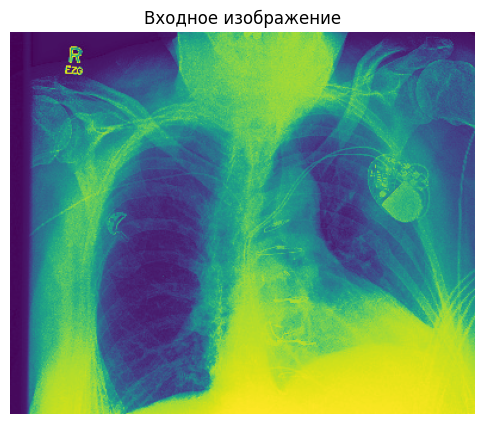

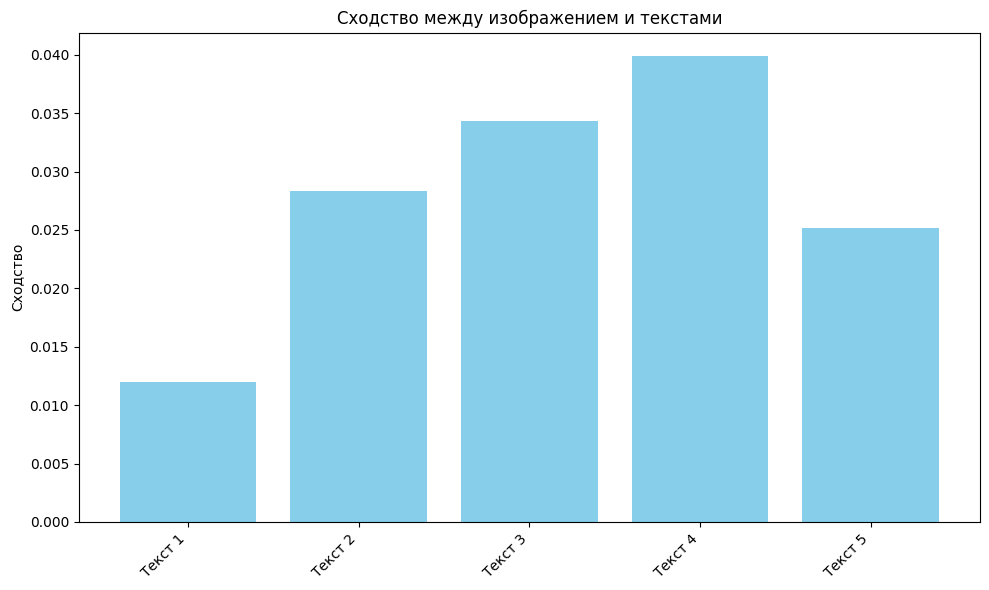

Текст 1 (сходство: 0.0120): lungs remain severely hyperinflated with upper lobe emphysema
Текст 2 (сходство: 0.0283): opacity left costophrenic angle is new since prior exam
Текст 3 (сходство: 0.0343): normal chest radiograph with no evidence of active disease
Текст 4 (сходство: 0.0399): cardiomegaly with pulmonary vascular congestion suggesting heart failure
Текст 5 (сходство: 0.0252): right middle lobe pneumonia with small pleural effusion


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

def visualize_image_text_similarity(model, processor, image_path, texts):
    image = Image.open(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title('Input image')
    plt.show()

    inputs = processor(
        text=texts,
        images=image,
        return_tensors="pt",
        padding=True
    )

    for k, v in inputs.items():
        if isinstance(v, torch.Tensor):
            inputs[k] = v.to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    img_embeds = F.normalize(outputs['img_embeds'], dim=1)
    text_embeds = F.normalize(outputs['text_embeds'], dim=1)

    similarity = torch.matmul(img_embeds, text_embeds.t())[0].cpu().numpy()

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(texts)), similarity, color='skyblue')
    plt.xticks(range(len(texts)), [f"Text {i+1}" for i in range(len(texts))], rotation=45, ha='right')
    plt.ylabel('Similarity')
    plt.title('Similarity between image and texts')
    plt.tight_layout()
    plt.show()

    for i, (text, sim) in enumerate(zip(texts, similarity)):
        print(f"Text {i+1} (Similarity: {sim:.4f}): {text}")

texts = [
    "lungs remain severely hyperinflated with upper lobe emphysema",
    "opacity left costophrenic angle is new since prior exam",
    "normal chest radiograph with no evidence of active disease",
    "cardiomegaly with pulmonary vascular congestion suggesting heart failure",
    "right middle lobe pneumonia with small pleural effusion"
]

if 'model' not in locals() or not isinstance(model, MedCLIPModel):
    processor = MedCLIPProcessor()
    model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
    model.from_pretrained()
    model.to(device)

visualize_image_text_similarity(model, processor, './example_data/view1_frontal.jpg', texts)

## 7. Conclusion

In this notebook, we reproduced the main results of MedCLIP, a contrast learning method for medical images and text using semantic matching. We demonstrated:

1. Loading and using a pre-trained MedCLIP model
2. Classifying medical images using text prompts
3. Implementing the MedCLIP semantic loss function
4. Visualizing the model results

MedCLIP sets a new standard of performance in medical multimodal learning by allowing the use of fragmented medical data without full image-report pairs and taking into account partial semantic matches to improve diagnostic accuracy.